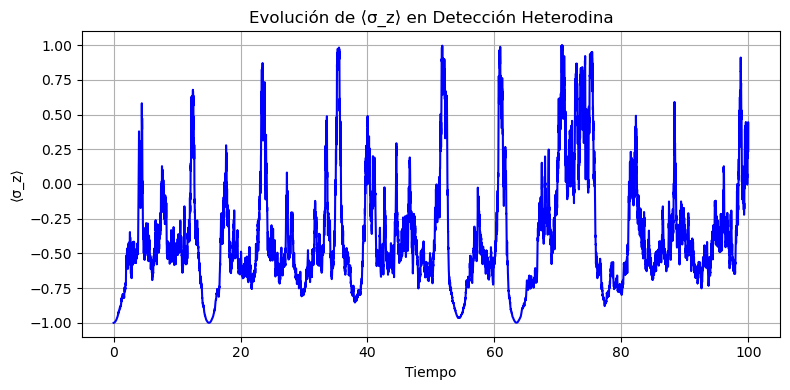

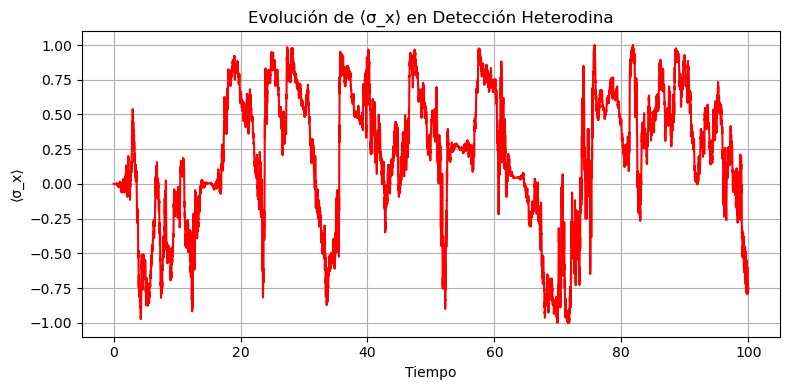

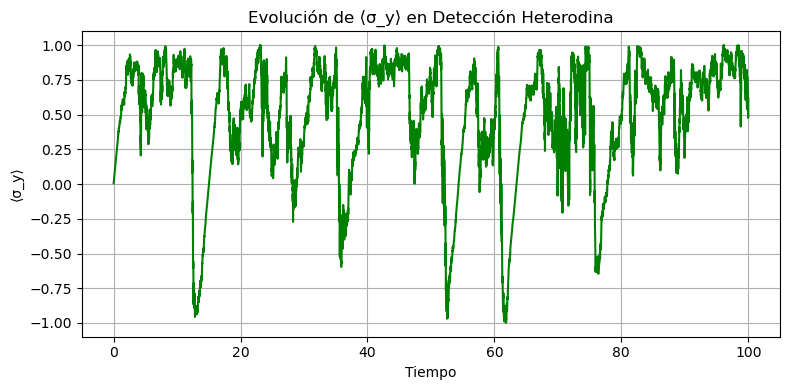

In [17]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# Parámetros
gamma = 1          # Tasa de detección
t_max = 100        # Tiempo de simulación
dt = 0.01            # Paso de tiempo
Omega = 0.5            # Frecuencia de Rabi
steps = int(t_max / dt)
Delta = 0         # Desintonía
num_traj = 1     # Número de trayectorias
times = np.linspace(0, t_max, steps)
# Eficiencia del detector
eta = 1

# Operadores cuánticos
sm = qt.destroy(2)    # σ-
sp = sm.dag()         # σ+
Pe = sp * sm          

# Operadores de Pauli
sx = sp + sm
sy = -1j * (sp - sm)
sz = sp * sm - sm * sp

# Hamiltoniano del sistema (Rabi)
H_sys = Delta * sp * sm + 0.5 * Omega * (sp + sm)

# Función para una trayectoria estocástica
def simulate_trajectory():
    psi_t = qt.basis(2, 0).unit()  # Estado inicial |g⟩
    pop_z, values_x, values_y = [], [], []

    for _ in range(steps):
        dW1 = np.random.normal(0, np.sqrt(dt))
        dW2 = np.random.normal(0, np.sqrt(dt))
        dZ = (dW1 + 1j * dW2) / np.sqrt(2)
        eta_Z = dZ / (dt * eta)

        I_t = gamma * qt.expect(sp, psi_t) + np.sqrt(gamma) * eta_Z
        H_feedback = 1j * I_t * sm

        H_total = H_sys + H_feedback

        # Evolución del estado
        dpsi = (-1j * H_total * psi_t) * dt
        psi_t = (psi_t + dpsi).unit()

        # Medimos los operadores de Pauli
        pop_z.append(qt.expect(sz, psi_t))
        values_x.append(qt.expect(sx, psi_t))
        values_y.append(qt.expect(sy, psi_t))

    return pop_z, values_x, values_y

# Simulando múltiples trayectorias
trajectories_z = np.zeros((num_traj, steps))
trajectories_x = np.zeros((num_traj, steps))
trajectories_y = np.zeros((num_traj, steps))

for k in range(num_traj):
    pop_z, val_x, val_y = simulate_trajectory()
    trajectories_z[k, :] = pop_z
    trajectories_x[k, :] = val_x
    trajectories_y[k, :] = val_y
    print(f"Simulacion DHt: Trayectoria {k+1}/{num_traj}", end="\r")

# Promedios
avg_z = np.mean(trajectories_z, axis=0)
avg_x = np.mean(trajectories_x, axis=0)
avg_y = np.mean(trajectories_y, axis=0)

# Graficar ⟨σ_z⟩
plt.figure(figsize=(8, 4))
plt.plot(times, avg_z, label='⟨σ_z⟩', color='blue')
plt.xlabel('Tiempo')
plt.ylabel('⟨σ_z⟩')
plt.title('Evolución de ⟨σ_z⟩ en Detección Heterodina')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar ⟨σ_x⟩
plt.figure(figsize=(8, 4))
plt.plot(times, avg_x, label='⟨σ_x⟩', color='red')
plt.xlabel('Tiempo')
plt.ylabel('⟨σ_x⟩')
plt.title('Evolución de ⟨σ_x⟩ en Detección Heterodina')
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar ⟨σ_y⟩
plt.figure(figsize=(8, 4))
plt.plot(times, avg_y, label='⟨σ_y⟩', color='green')
plt.xlabel('Tiempo')
plt.ylabel('⟨σ_y⟩')
plt.title('Evolución de ⟨σ_y⟩ en Detección Heterodina')
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
gamma = 1          # Tasa de detección
Omega = 1          # Frecuencia de Rabi
t_max = 10         # Tiempo de simulación
dt = 0.01          # Paso de tiempo
Delta = 1          # Desintonía
num_traj = 10      # Número de trayectorias
steps = int(t_max / dt)
eta = 1            # Eficiencia del detector

# Operadores cuánticos
sm = qt.destroy(2)    # σ-
sp = sm.dag()         # σ+
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()

H_sys = Delta * sp * sm + 0.5 * Omega * (sp + sm)  # Hamiltoniano del sistema

# Función para una trayectoria estocástica
def simulate_trajectory():
    psi_t = qt.basis(2, 0).unit()  # Estado inicial |g⟩
    sx_vals, sy_vals, sz_vals = [], [], []

    for _ in range(steps):
        # Detección heterodina
        dW1 = np.random.normal(0, np.sqrt(dt))
        dW2 = np.random.normal(0, np.sqrt(dt))
        dZ = (dW1 + 1j * dW2) / np.sqrt(2)
        eta_Z = dZ / (dt * eta)

        I_t = gamma * qt.expect(sp, psi_t) + np.sqrt(gamma) * eta_Z
        H_feedback = 1j * I_t * sm
        H_total = H_sys + H_feedback

        # Evolución del estado
        dpsi = (-1j * H_total * psi_t) * dt
        psi_t = (psi_t + dpsi).unit()

        # Valores esperados
        sx_vals.append(qt.expect(sx, psi_t))
        sy_vals.append(qt.expect(sy, psi_t))
        sz_vals.append(qt.expect(sz, psi_t))

    return sx_vals, sy_vals, sz_vals

# Simulación de múltiples trayectorias
trajectories = [simulate_trajectory() for _ in range(num_traj)]

# Configuración de la esfera de Bloch
fig = plt.figure()
bloch = qt.Bloch(fig=fig)

# Función de actualización de la animación
def update(frame):
    bloch.clear()
    for traj in trajectories:
        bloch.add_points([traj[0][:frame], traj[1][:frame], traj[2][:frame]], 'm')
    bloch.render()

ani = FuncAnimation(fig, update, frames=steps, repeat=True, interval=50)
plt.show()


C:\Users\LordKelvin\anaconda3\Lib\site-packages\matplotlib\animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<Figure size 640x480 with 0 Axes>